<img src=https://scitools.org.uk/cartopy/docs/v0.16/_images/sphx_glr_logo_001.png width=400 />

# Lesson 28: CartoPy Basics

This lesson is modified from [Introduction to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) by [Project Pythia](https://projectpythia.org), and [Maps with CartoPy](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html) by [Research Computing in Earth Science](https://rabernat.github.io/research_computing_2018/)



[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aselshall/eds/HEAD)

---

## Overview

CartoPy is a Python library that provides cartographic tools for creating maps and visualizing geospatial data with Matplotlib. By then end of this lesson you will be able to 
1. Explain core Cartopy concepts such as map projections and `GeoAxes`
2. . Creating regional maps with raster data (where each cell contains a single value) or vector data (represting geographic features as points, lines, and polygons)
3. Create a map figure with multiple subplots


---

## Installation and import

We import the main libraries of Cartopy: Coordinate Reference Systems (crs) and Feature. 
- CRS defines how coordinates are projected onto a flat surface.
- Features in Cartopy represent elements such as coastlines, borders, and rivers that can be added to maps for better visualization and context.


In [1]:
#pip install cartopy

In [2]:
from cartopy import crs as ccrs
from cartopy import feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

#  Suppress warnings issued by Cartopy when downloading data files
import warnings
warnings.filterwarnings('ignore')

___

## 1. Basic concepts

Python integratez with libraries and tools for data analysis, visualization, and machine learning. This allows you to create end-to-end workflows. An important step in the workflow is map plotting.


### 1.1 Extend Matplotlib's `axes` into georeferenced `GeoAxes`

In previous tutorials, we learned that a *figure* in Matplotlib consists of a `Figure` object and a list of one or more `Axes` objects (subplots). By importing `cartopy.crs`, we gain access to Cartopy's *Coordinate Reference System*, which offers various geographical projections. Specifying one of these projections for an `Axes` object transforms it into a `GeoAxes` object, effectively *georeferencing* the subplot. 

### 1.2 Create a map with a specified projection

Here, we will generate a `GeoAxes` object with the `PlateCarree` projection. The `PlateCarree` projection is a global lat-lon map projection where each point is evenly spaced in terms of degrees. The term "Plate Carré" is French for "flat square."


Text(0.5, 1.0, 'A Geo-referenced subplot, Plate Carree projection')

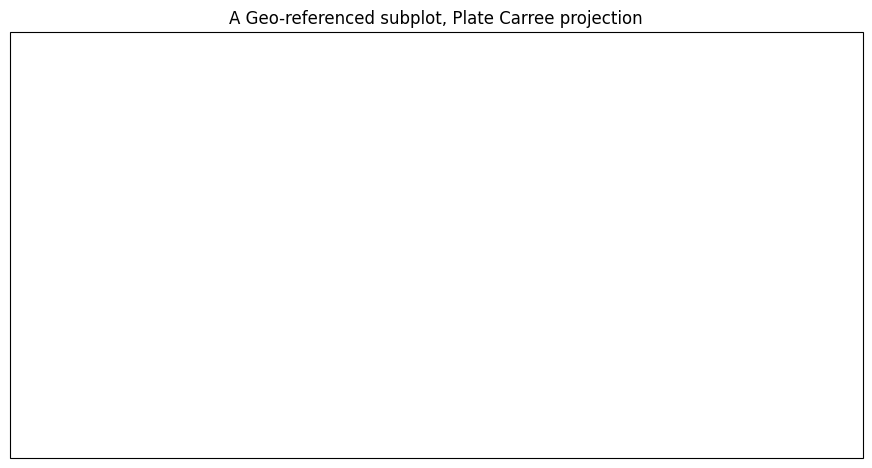

In [3]:
# Create a figure with a specified size
fig = plt.figure(figsize=(11, 8.5))

# Add a subplot with PlateCarree projection
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-75))
ax.set_title("A Geo-referenced subplot, Plate Carree projection")

Although the figure seems empty, it has been georeferenced using a map projection using Cartopy's `crs` (coordinate reference system) class. We can now add in cartographic features to our subplot in the form of *shapefiles*. One such cartographic feature is coastlines, which can be added to our subplot using the callable `GeoAxes` method simply called `coastlines`.

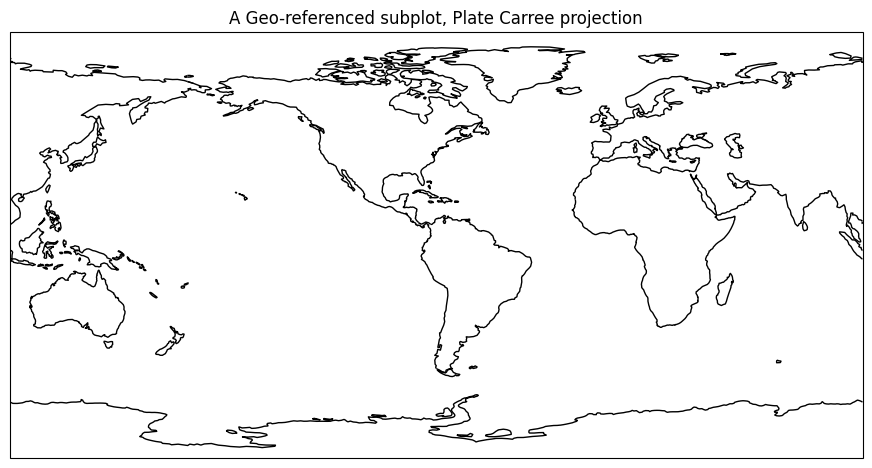

In [4]:
# Method 1 for pre-defined features of Natural Earht datasets
ax.coastlines(resolution='110m', color='black')
fig

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    To get the figure to display again with the features that we've added since the original display, just type the name of the Figure object in its own cell.
</div>

### 1.3 Add cartographic features to the map

Cartopy provides other cartographic features via its `features` class, which was imported at the beginning of this page, under the name `cfeature`. These cartographic features are represented as data stored in shapefiles. When these cartographic features are called for the first time in a script or notebook, the shapefiles are downloaded from [Natural Earth Data](https://www.naturalearthdata.com/features/). A list of the different Natural Earth shapefiles can be accessed from [CartoPy documentation](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html) including a list of CartoPy pre-defined features (e.g. `.BORDERS` and `.STATES`).

To incorporate these features into our subplot, we can utilize the `add_feature` method, which permits the specification of attributes (e.g., line style) through arguments (e.g. `linestyle=dashed`), similar to Matplotlib's `plot` method.

Let us include borders and U.S. state lines in our subplot.

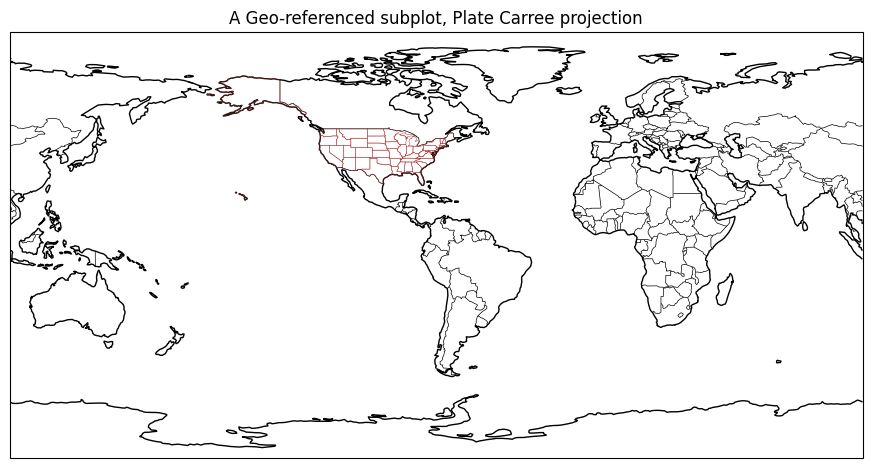

In [5]:
# Adding borders and states to the plot
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.STATES, linewidth=0.3, edgecolor='brown')

fig

In the above example, we used predefined features like `cfeature.BORDERS`, but we can use any Natural Earth dataset by creating a CartoPy instance with `cfeature.NaturalEarthFeature()` as explained further below.

### 1.4 Add a background image 

CartoPy has only one pre-created background image that you can use with `.stock_img` method. You can add other background images such as [etopo toppgraphy or NASA Blue marble](http://earthpy.org/cartopy_backgroung.html) using background_img() method. In addition to background images, you can use `ax.imshow()` in CartoPy to display any image on your map as detailed below.

Let us add the pre-created background image `stock_img`:

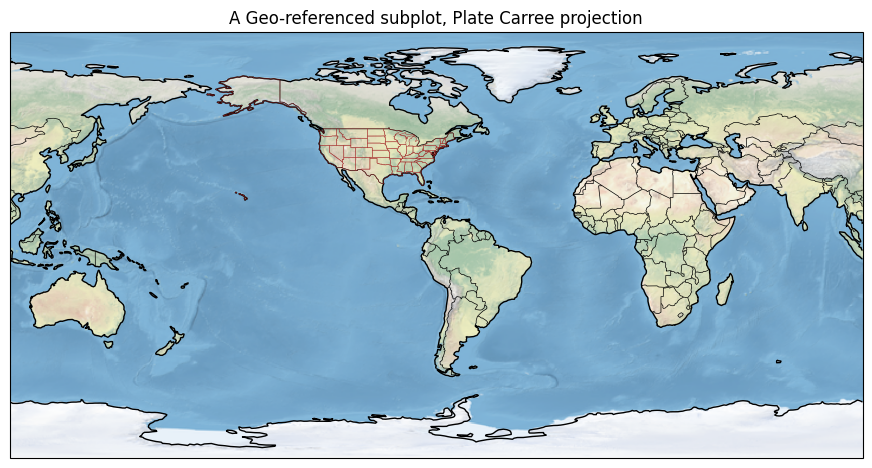

In [6]:
#Add the only pre-created background image in CartoPy
ax.stock_img()

fig

### 1.5 Cartopy's map projections

The [crs class](https://scitools.org.uk/cartopy/docs/latest/reference/crs.html) of CartoPy offers a [variety of map projections](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html) for visualizing geospatial data such as
1. **Plate Carree** that represents the globe as a rectangular grid with equal spacing in all directions, and thus exaggerates the spatial extent of regions closer to the poles. 
3. **Mercator**, which is a cylindrical map projection that preserves straight lines, making it useful for navigation purposes.
4. **Robinson** that balances distortions in size and shape, suitable for world maps.
5. **Orthographic**, a perspective projection where the globe is projected onto a tangent plane, creating a realistic view of the Earth.
6. **Mollweide**, an equal-area projection that distorts shape and direction while preserving area, making it ideal for thematic maps and often used with global satellite mosaics

In the Plate Carree (Equirectangular) projection, the meridians (lines of longitude) and parallels (lines of latitude) are straight and intersect at right angles similar to Mecator. This characteristic contributes to the simplicity of the Plate Carree projection, as the grid lines form a regular rectangular grid on the map. However. the distortion increases as you move towards the poles, making the higher latitudes appear larger than they actually are.

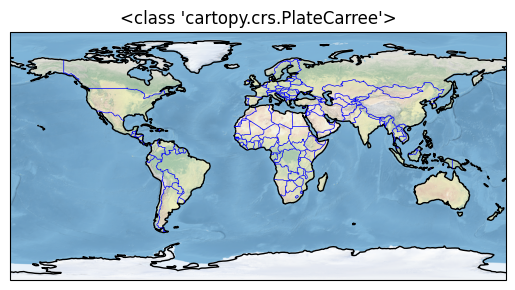

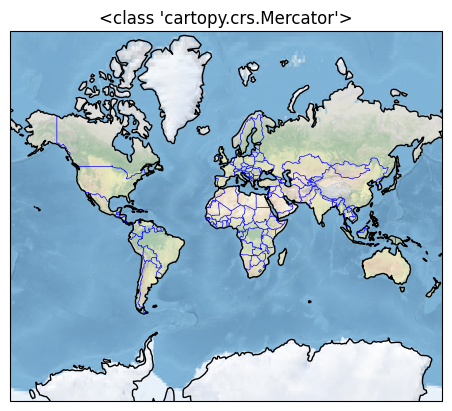

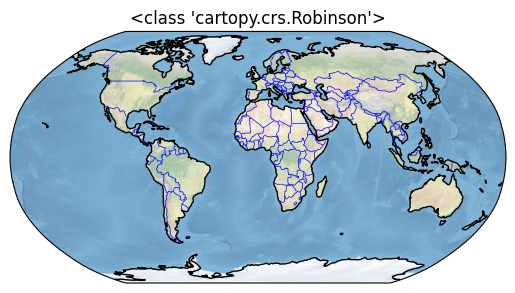

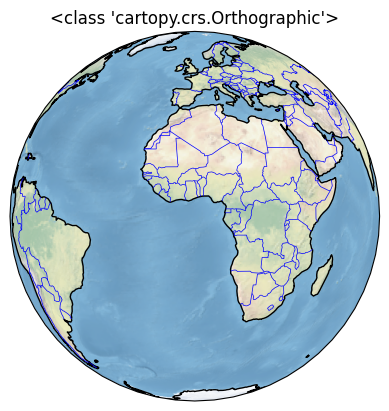

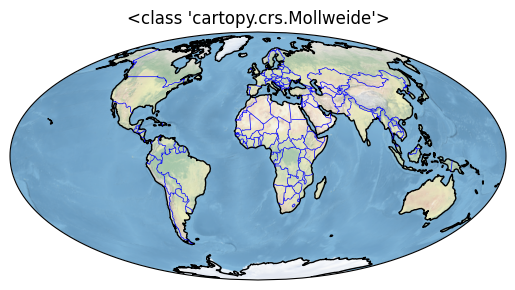

In [7]:
projections = [ccrs.PlateCarree(),
               ccrs.Mercator(),
               ccrs.Robinson(),
               ccrs.Orthographic(),
               ccrs.Mollweide(),
              ]

for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue');
    ax.set_title(f'{type(proj)}');

## 2. Create regional maps

For this example, let us plot a map for the Gulf of Mexico. We will :
1. set extend to the Gulf of Mexico lat and lon coordinates
2. add features such as coastlines, boarder, states, land, rivers, ocean, and bathymetry
3. plot features such as markers for major cities, a track line, and study area boundaries
4. plot 2d raster data such as sea surface height (zos)
5. Add and georeference an image to our map

Let us do this part by part.

### 2.1 Cartopy's `set_extent` method

Using Plate Carree projection, we will use Cartopy's `set_extent` method to restrict the map coverage to a Florida view. 

Here we set the domain, which defines the geographical region to be plotted that is used in the `set_extent` call. Since these coordinates are expressed in degrees, they correspond to a PlateCarree projection.

In [8]:
#Select plot extend: Lon_West, Lon_East, Lat_South, Lat_North in Degrees
extent = [-75, -100, 18, 31] 
cLon = (extent[0] + extent[1]) / 2
cLat = (extent[2] + extent[3]) / 2

#Select projection
projPC = ccrs.PlateCarree()

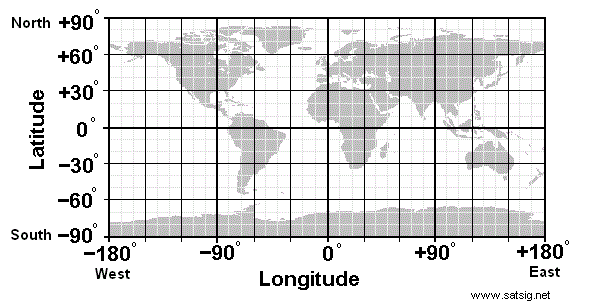

Source:[https://www.satsig.net/lat_long.htm](https://www.satsig.net/lat_long.htm)

Let us do this regional plot including plotting the latitude and longitude lines, and adding a title.


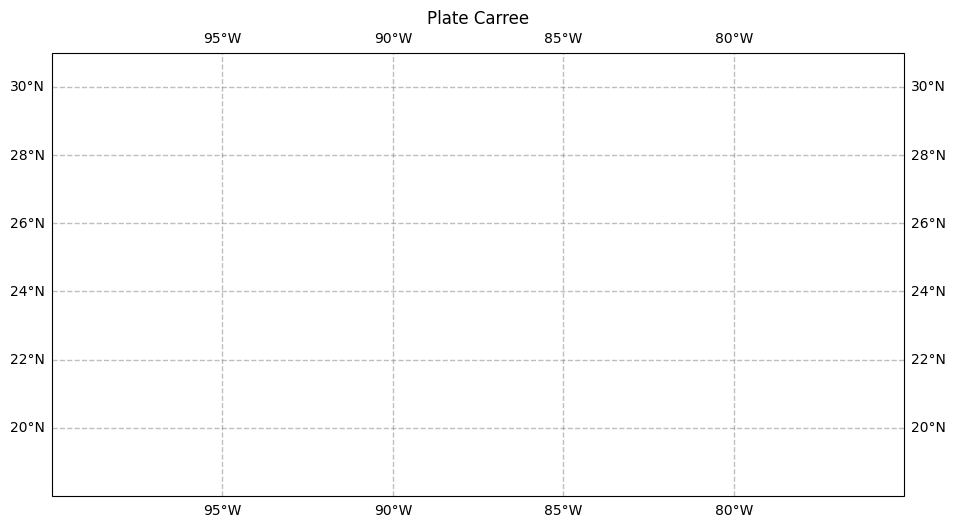

In [9]:
# Create figure and axes
fig = plt.figure(figsize=(11, 8.5))
ax = plt.subplot(1, 1, 1, projection=projPC)

# Setting the extent of the plot
ax.set_extent(extent, crs=projPC)

# Add plot title and gridlines
ax.set_title('Plate Carree')
ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
     The call to the <code>subplot</code> method use PateCarree projection, the calls to <code>set_extent</code> use PlateCarree. This ensures that the values we passed into <code>set_extent</code> will be transformed from degrees into the values appropriate for the projection we use for the map. Here it makes no difference since the map projection is also PateCarree.
</div>

### 2.2 Adding features from Natural Earth Datasets

In CartoPy, you can add features from Natural Earth datasets to a map in various ways.

```python

# Method 1 for Cartopy pre-defined features of Natural Earht datasets
ax.add_feature(cfeature.COASTLINE.with_scale('10m'),color='black')`,

# Method 2 beyond Cartopy pre-defined features of Natural Earht datasets
ax.add_feature(cfeature.NaturalEarthFeature(
    category='physical', 
    name='coastline', 
    scale='10m', 
    facecolor='none', 
    edgecolor='black'))
```

The first method is suitable for [CartoPy's pre-defined features](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html) including BORDERS, COASTLINE, LAKES, LAND, OCEAN, RIVERS, and STATES, while the second method allows you to incorporate additional shapefiles from Natural Earth beyond the pre-defined features. When using pre-defined features, you can specify resolutions of '10m', '50m', or '110m. For custom Natural Earth features, ensure to verify the available resolutions for the feature you intend to add by referring to the [Natural Earth features website](https://www.naturalearthdata.com/features/).

#### 2.2.1 Add some predefined features

For illustration, let us use the first method to add some pre-defined features such as boarders, land, rivers, and lakes.  Some cartographical features are predefined as constants in the `cartopy.feature` package. The resolution of these features depends on the amount of geographical area in your map, specified by `set_extent`.

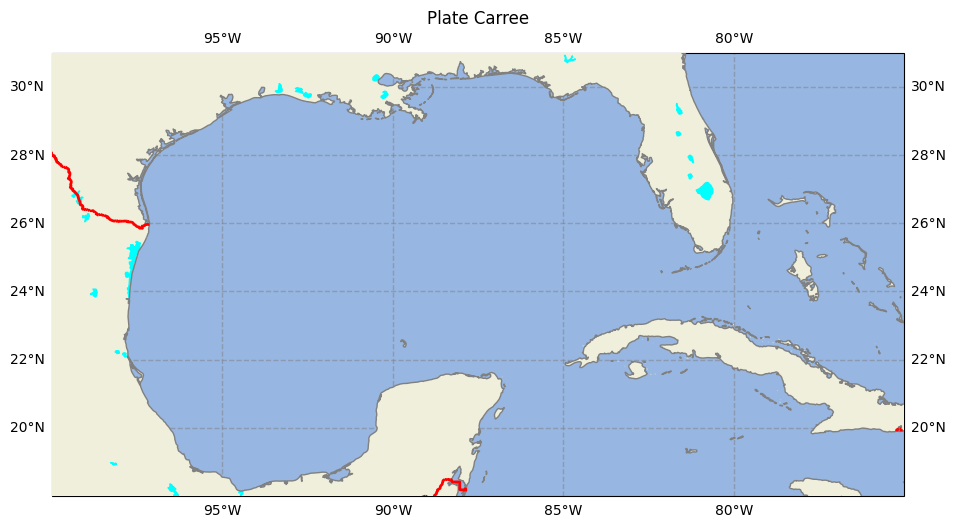

In [10]:
# Set background color to water color
ax.set_facecolor(cfeature.COLORS['water'])

# Add Land with zorder=0 meaning that feature order will be backward
ax.add_feature(cfeature.LAND.with_scale('10m'), zorder=20) 

# Add Coastlines, and Lakes above Land features
ax.add_feature(cfeature.LAKES.with_scale('10m'), color='aqua', zorder=21) 
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color='gray', zorder=21) 

# Add Boarders feature on the top
ax.add_feature(cfeature.BORDERS, 
               edgecolor='red',facecolor='none', linewidth=2, zorder=22) 

fig

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note:</p>
    For high-resolution Natural Earth shapefiles such as this, while we could add Cartopy's <code>OCEAN</code> feature, it currently takes <i>much longer</i> to render on the plot. Instead, we take the strategy of first setting the facecolor of the entire subplot to match that of water bodies in Cartopy. When we then layer on the <code>LAND</code> feature, pixels that are not part of the <code>LAND</code> shapefile remain in the background as <code>water</code> facecolor, which is the same color as the <code>OCEAN</code>.
</div>

By setting different `zorder` values for different map features, you control their drawing order on the plot canvas. Features with higher `zorder` values are drawn on top of those with lower values. The above code adds land features and sets the `zorder` to 20, meaning that these land features will be drawn below features with higher `zorder` values such as lakes and coastlines with `zorder` of 21  to ensure that lakes and coastlines are  drawn above land features. The code adds borders to the plot with `zorder` of 22, placing the borders on top of all other features. We will later assign `zorder` values of 10 to 19 to ocean features to ensure that they drawn below land featurs.

#### 2.2.2 Add shapefiles from Natural Earth

Instead of using pre-defined features, here we will use [shapefiles from Natural Earth](https://www.naturalearthdata.com/features/). This requires much more code than previous examples. We first need to create new objects associated shapefiles using the `NaturalEarthFeature` method, which is part of the Cartopy `feature` class. Then we can use `add_feature` to add the new objects to our new map. 

The general syntax is
```python
ax.add_feature(cfeature.NaturalEarthFeature(
    category='physical', 
    name='coastline', 
    scale='10m', 
    facecolor='none', 
    edgecolor='black'))
```
The `category`can be:
- 'physical' with `name` such as 'coastline', 'land', 'rivers_lake_centerlines', etc.
- 'cultural' with `name` such as 'state', 'urban polygons', `admin_1_states_provinces`, etc. 

and  the scale can be `10`, `50`, or `110`. 

To find the feature `category`, `name` and `scale`:
- select the feature that you want from [Natural Earth Data](https://www.naturalearthdata.com/features/)
- and obtain the `category`, `name` and `scale` from the feature download link.

For example, for rivers in North America, the download link is:

> [http//www.naturalearthdata.com/download/10m/physical/ne_10m_rivers_north_america.zip](http//www.naturalearthdata.com/download/10m/physical/ne_10m_rivers_north_america.zip)

Accordingly, we can set `category='physical'`,  `name='rivers_north_america'`, and `scale='10m'`, and so on.

Let us add rivers and supplementary North America rivers. In addition, let us add few bathymetry lines using a loop.

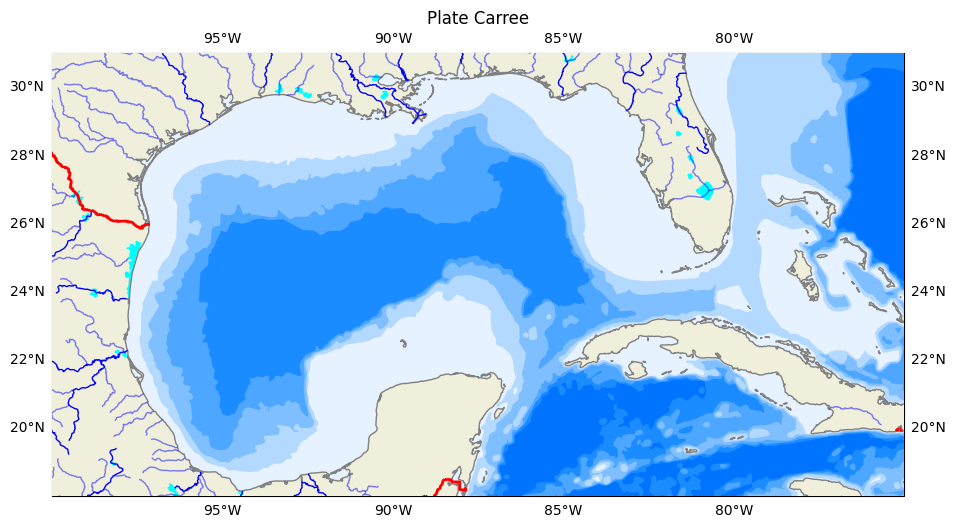

In [11]:
# Add rivers
ax.add_feature(cfeature.NaturalEarthFeature(
    'physical',
    'rivers_lake_centerlines',
    scale='10m',
    edgecolor='blue',
    facecolor='none')
               ,zorder=21)

# Add additional for North America
ax.add_feature(cfeature.NaturalEarthFeature(
    'physical',
    'rivers_north_america',
    scale='10m',
    edgecolor='blue',
    facecolor='none',
    alpha=0.5),
               zorder=21)

# Plot 6 bathymetry lines using a loop
# Names of bathymetry line 
bathymetry_names = ['bathymetry_L_0', 'bathymetry_K_200', 
                    'bathymetry_J_1000', 'bathymetry_I_2000', 
                    'bathymetry_H_3000', 'bathymetry_G_4000'] 

# Very light blue to light blue generated by ChatGPT 3.5 Turbo
colors = [(0.9, 0.95, 1), (0.7, 0.85, 1), 
          (0.5, 0.75, 1), (0.3, 0.65, 1), 
          (0.1, 0.55, 1), (0, 0.45, 1), ]  

# Loop to plot each bathymetry line
for bathymetry_name, color in zip(bathymetry_names, colors):
    ax.add_feature(
        cfeature.NaturalEarthFeature(
            category='physical', 
            name=bathymetry_name, 
            scale='10m', 
            edgecolor='none', 
            facecolor=color), 
        zorder = 11)

fig

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Be patient; when plotting a small geographical area, the high-resolution "10m" shapefiles are used by default.  As a result, these plots take longer to create, especially if the shapefiles are not yet downloaded from Natural Earth.  Similar issues can occur whenever a `GeoAxes` object is transformed from one coordinate system to another. 
</div>

### 2.3 plot user-defined features

Let us as study area boundaries, a track line, and markers for major cities.



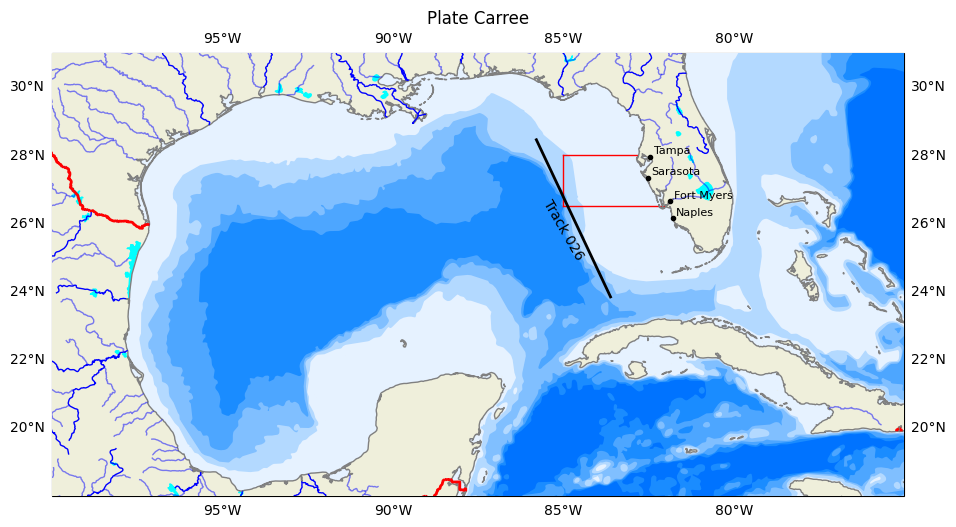

In [12]:
# Plot site area on GeoAxes given lon and lat coordinates
ax.plot([-85.0, -85.0], [26.5, 28.0], color='red', linewidth=1, zorder = 15)  
ax.plot([-85.0, -82.85], [28.0, 28.0], color='red', linewidth=1, zorder = 15)
ax.plot([-85.0, -81.9], [26.5, 26.5], color='red', linewidth=1, zorder = 15)


# Plot Track 026 line on GeoAxex and annotate with text using axes cooridnates
# Deinfe start and end points of the line
points = np.array([[-85.7940, 28.4487], [-83.6190, 23.8411]]) 

# Plot the line
ax.plot(points[:,0],points[:,1], color='black', linewidth=2, zorder = 15)

# Annotate the line
ax.text(0.6, 0.6,  # Coordinates are in axes coordinate rather than data coordinates  
        'Track 026',  # Specify text content
        transform=ax.transAxes,  # Set coordinate system for coordinates, which is the coordinate system of the axes itself 
        color='black',  # Set color of the text
        fontsize=10,  # Set font size of the text
        ha='center',  # Set horizontal alignment of the text
        va='center',  # Set vertical alignment of the text
        rotation=300, # Rotate text
        zorder = 15,  # Plot order of the feature
       )

# Add names and locations of major cities
# Define markers for each location as a dictionary
locations_coordinates = {
    "Tampa": [27.9506, -82.4572],
    "Sarasota": [27.3364, -82.5307],
    "Fort Myers": [26.6406, -81.8723],
    "Naples": [26.142, -81.7948]}

# Use a loop to add markers and text labels slightly away from each other for each location 
for location, coordinates in locations_coordinates.items():
    #Plot marker
    ax.plot(coordinates[1],  # lon coordinate of locatin in Degrees
            coordinates[0],  # lat coordinate of locatin in Degrees
            transform=ccrs.PlateCarree(),  # Set coordinate system for coordinates, which is Plate Carree
            marker='o',      # Marker style for the plot
            color='black',     # Color of the markers
            markersize=3,    # Size of the markers   
            zorder = 22,  # Plot order of the feature
           )
    #Annote each city
    ax.text(coordinates[1] + 0.1,   # lon coordinate of locatin in Degrees (slightly adjusted away from marker)
            coordinates[0] + 0.1,   # lat coordinate of locatin in Degrees (slightly adjusted away from marker)
            location,               # Text to display (city name)
            transform=ccrs.PlateCarree(),   # Specify coordinate system for coordinates, which is Plate Carree
            color='black',           # Color of the text
            fontsize=8,              # Font size of the text
            zorder = 22,  # Plot order of the feature
           )

fig

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note:</p>
    The transform=ax.transAxes parameter is used to specify the coordinate system of the provided coordinates.  In this case, <code>ax.transAxes</code> refers to the coordinate system of the axes itself. When you use <code>ax.transAxes</code>, the coordinates (0,0) correspond to the lower left corner of the axes and (1,1) correspond to the upper right corner of the axes, regardless of the data limits or scales within the plot. By specifying <code>transform=ax.transAxes</code>, you are indicating that the coordinates (0.6, 0.6) are relative to the size of the axes, ensuring that the text 'Track 026' is positioned at 60% of the width and 60% of the height of the axes, regardless of the data being plotted.
</div>

### 2.4 Plot 2d raster data 

Plotting data on a Cartesian grid is like using the PlateCarree projection, where meridians and parallels are straight lines with constant spacing. We can plot our raster data as a contour map. Similar to what we did before, we use the `transform` keyword argument in the contour-plotting method to specify the current projection of our raster data, which will be transformed into the projection of our `subplot` method. In this particular case, we do not need to use use the `transform` keyword since the project of our raster data is Plate Carree, which is the same as our subplot projection. 

We can read raster data from a NetCDF file using `xr.open_dataset()`, or generate our data. Let us generate some data that we can add to our figure.

In [13]:
# Create coordinates for the four labels
dates = pd.date_range('2024-01-03', periods=2)  # Generating a time range for the data
depths = [10, 20, 30]  # List of depth values
latitudes = np.linspace(24.5,30.5,80)  # latitude values (y-values)
longitudes =np.linspace(-87,-77,100)  # longitude values (x-values)

# Create a 4D Numpy Array representing values  for a 2x3x4x5 grid
size=(len(dates), len(depths), len(latitudes), len(longitudes))
zos = np.round(np.random.uniform(-1, 1, size= size), 2) #sea surface height [m]
tos = np.round(np.random.uniform(26, 30, size=size), 2) #sea surface temperature [C]
sos = np.round(np.random.uniform(33, 36, size=size), 2) #sea surface salinty (PSU) 
                 
# Create a DataArray with zos values
ds = xr.Dataset({'zos': (('date', 'depth', 'lat', 'lon'), zos),
                'tos': (('date', 'depth', 'lat', 'lon'), tos),
                'sos': (('date', 'depth', 'lat', 'lon'), sos),},
    coords={'date': dates, 'depth': depths, 'lat': latitudes, 'lon': longitudes})

# Add metadata to the DataArray
ds.zos.attrs['Description'] = "Sea surface height above the geoid (m)"
ds.tos.attrs['Description'] = "Sea surface temperature (°C)"
ds.sos.attrs['Description'] = "Sea surface salinty (PSU)" 

# Display ds
ds

<xarray.Dataset> Size: 1MB
Dimensions:  (date: 2, depth: 3, lat: 80, lon: 100)
Coordinates:
  * date     (date) datetime64[ns] 16B 2024-01-03 2024-01-04
  * depth    (depth) int64 24B 10 20 30
  * lat      (lat) float64 640B 24.5 24.58 24.65 24.73 ... 30.35 30.42 30.5
  * lon      (lon) float64 800B -87.0 -86.9 -86.8 -86.7 ... -77.2 -77.1 -77.0
Data variables:
    zos      (date, depth, lat, lon) float64 384kB -0.43 0.79 ... -0.68 0.93
    tos      (date, depth, lat, lon) float64 384kB 29.03 27.05 ... 26.79 27.55
    sos      (date, depth, lat, lon) float64 384kB 35.11 35.49 ... 33.52 35.18

Let us add a slice of this zos data to our map, add a colorbar for zos, and add a label to the color bar.

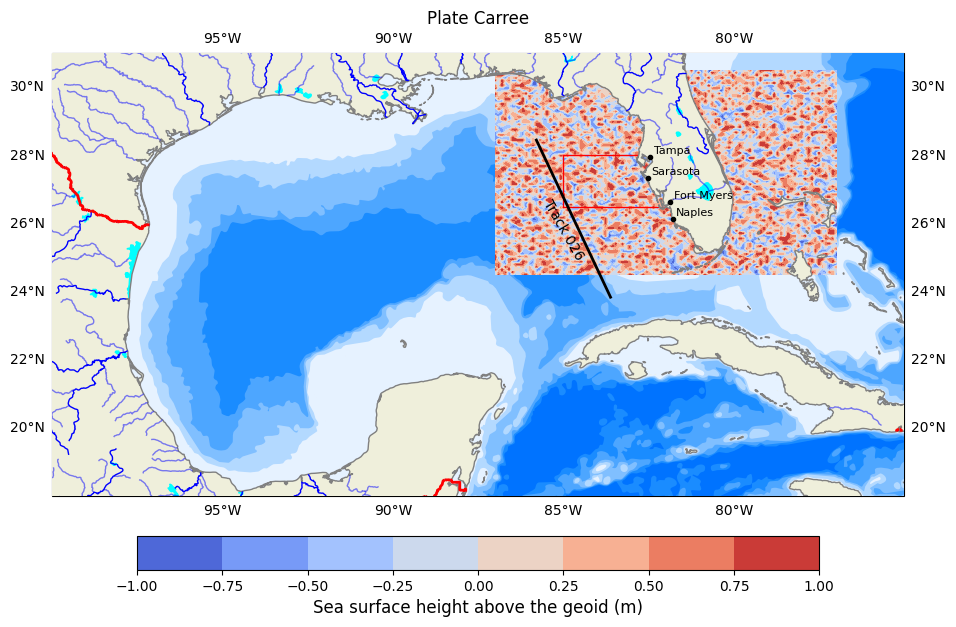

<Figure size 640x480 with 0 Axes>

In [14]:
# Select the data for the specific time and depth
data_slice = ds.zos.isel(date=0, depth=0)  

dataplot = ax.contourf(data_slice.lon,   # X-coordinates for the contour plot
                       data_slice.lat,   # Y-coordinates for the contour plot
                       data_slice,       # Data values to plot
                       cmap='coolwarm',  # Colormap for the plot
                       zorder=12,         # Drawing order for the plot above bathymetry and below land and study area
                       transform=ccrs.PlateCarree()  #Not needed as both our data and figure are Plate Carree
                      )

# Add a colorbar
colorbar = plt.colorbar(dataplot,  # Create a colorbar for dataplot data
                        orientation='horizontal',  # Set the orientation of the colorbar to horizontal
                        pad=0.06,  # Set the padding between the colorbar and the plot
                        shrink=0.8)  # Adjust the size of the colorbar to 80% of the default size

# Add a label to the colorbar with a specified font size
colorbar.set_label(ds.zos.attrs['Description'],  fontsize=12)


fig

### 2.5 Adding and georeferencing an image to a map

We can add a satellite image on the map if we know the coordinates of the image edges. 

In [15]:
# Read image 
img = plt.imread('Data/Track026.png')
img_extent = (-90, -81, 23, 31) #lon E to W and Lat S to N

# Add image to map 
ax.imshow(img,              # Image to plot
          origin='upper',   # Origin is upper left corner for png image
          extent=img_extent, 
          transform=ccrs.PlateCarree(), # Specify coordinate system for image coordinates 
          zorder=12,        # Drawing order for image is above raster data but below land
         )

fig

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Track026.png'

## 3. A figure with multiple subplots

Let put everything together and create a figure with three subplots for the three variables and one with an image, using a loop.

In [ ]:
# 1) Select plot extend: Lon_West, Lon_East, Lat_South, Lat_North in Degrees
extent = [-75, -100, 18, 31] 
cLon = (extent[0] + extent[1]) / 2
cLat = (extent[2] + extent[3]) / 2

# 2) Select projection
projPC = ccrs.PlateCarree()

# 3) Create figure
fig = plt.figure(figsize=(11, 8.5))
plt.subplots_adjust(hspace=0.1, wspace=0.2)  # Adjust the height and width spaces between subplots

# 4) Loop to plot variables 
variables = ['zos','tos','sos', 'image']
titles = ['(a) ', '(b)', '(c)', '(d)']
colormaps = ['coolwarm', 'jet', 'viridis', '']

for index, (variable, title, colormap) in enumerate(zip(variables, titles, colormaps)):

    # 5) Create Axes     
    ax = plt.subplot(2, 2, index+1, projection=projPC)
    
    # 6) Setting the extent of the plot
    ax.set_extent(extent, crs=projPC)
    
    # 7) Add plot title 
    ax.set_title(title, fontsize=10, loc='left')
    
    # 8) Add gridlines (we need to cutomize grid lines to improve visualization)                              
    gl = ax.gridlines(draw_labels=True, xlocs=np.arange(extent[1],extent[0], 5), ylocs= np.arange(extent[2], extent[3], 5),
                      linewidth=1, color='gray', alpha=0.5, linestyle='--',  zorder=40)
    gl.right_labels = False  # 
    gl.top_labels = False    # Set the font size for x-axis labels
    gl.xlabel_style = {'size': 10}  # Set the font size for x-axis labels
    gl.ylabel_style = {'size': 10}  # Set the font size for y-axis labels
    
    # 9) Adding Natural Earth features
    ## Pre-defined features
    ax.set_facecolor(cfeature.COLORS['water'])  #Blackgroundwater color for the ocean
    ax.add_feature(cfeature.LAND.with_scale('10m'), zorder=20) 
    ax.add_feature(cfeature.LAKES.with_scale('10m'), color='aqua', zorder=21) 
    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), color='gray', zorder=21) 
    ax.add_feature(cfeature.BORDERS, edgecolor='red',facecolor='none', linewidth=2, zorder=22) 

    ## General features (not pre-defined)
    ax.add_feature(cfeature.NaturalEarthFeature(
        'physical', 'rivers_lake_centerlines', scale='10m', edgecolor='blue', facecolor='none') ,zorder=21)
    ax.add_feature(cfeature.NaturalEarthFeature(
        'physical','rivers_north_america', scale='10m', edgecolor='blue', facecolor='none', alpha=0.5),zorder=21)

    ## Multiple features with a loop
    bathymetry_names = ['bathymetry_L_0', 'bathymetry_K_200', 'bathymetry_J_1000', 
                        'bathymetry_I_2000',  'bathymetry_H_3000', 'bathymetry_G_4000'] 
    colors = [(0.9, 0.95, 1), (0.7, 0.85, 1),  (0.5, 0.75, 1), (0.3, 0.65, 1),  (0.1, 0.55, 1), (0, 0.45, 1), ]  
    for bathymetry_name, color in zip(bathymetry_names, colors):
        ax.add_feature(cfeature.NaturalEarthFeature(
            category='physical', name=bathymetry_name, scale='10m', edgecolor='none', facecolor=color), zorder = 11)

    # 10) Adding user-defined features 
    ## Plot site area on GeoAxes given lon and lat coordinates in first subplot 
    if index == 0:
        ax.plot([-85.0, -85.0], [26.5, 28.0], color='black', linewidth=1, zorder = 15)  
        ax.plot([-85.0, -82.85], [28.0, 28.0], color='black', linewidth=1, zorder = 15)
        ax.plot([-85.0, -81.9], [26.5, 26.5], color='black', linewidth=1, zorder = 15)

    ## Plot Track 026 line on GeoAxex and annotate with text using axes cooridnates in second subplot
    if index == 1: 
        points = np.array([[-85.7940, 28.4487], [-83.6190, 23.8411]]) 
        ax.plot(points[:,0],points[:,1], color='black', linewidth=2, zorder = 15)
        ax.text(0.58, 0.6, 'Track 026', transform=ax.transAxes, 
                color='black', fontsize=10,  ha='center',  va='center',  rotation=300, zorder = 15)

    ## Adding names and locations of major cities
    locations_coordinates = {"Tampa": [27.9506, -82.4572], 
                             #"Sarasota": [27.3364, -82.5307], 
                             #"Fort Myers": [26.6406, -81.8723], 
                             "Naples": [26.142, -81.7948]}
    for location, coordinates in locations_coordinates.items():
        ax.plot(coordinates[1], coordinates[0],  
                transform=ccrs.PlateCarree(),  marker='o', color='black', markersize=3, zorder = 22)
        ax.text(coordinates[1] + 0.1, coordinates[0] + 0.1, 
                location, transform=ccrs.PlateCarree(), color='black', fontsize=8, zorder = 22)

    # 11) Adding raster data and colorbar for the first three subplots
    if index < 3: 
        data_slice = ds[variable].isel(date=0, depth=0)  
        dataplot = ax.contourf(data_slice.lon, data_slice.lat, data_slice, 
                               cmap=colormap, zorder=12, transform=ccrs.PlateCarree())
        colorbar = plt.colorbar(dataplot, orientation='horizontal', pad=0.1, shrink=1)  
        colorbar.set_label(ds[variable].attrs['Description'],  fontsize=10)

    # 12) Adding an image for the fourth subplot 
    else:
        img = plt.imread('Data/Track026.png')
        img_extent = (-90, -81, 23, 31) #lon E to W and Lat S to N
        imgplot = ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(), zorder=12)
        
        # adding invisible colorbar for the layout of the subplots remains aligned visually
        # you can also do this by adjusting subplot size or using GridSpec as suggested by ChatGPT 3.5 Turbo
        cbar = plt.colorbar(imgplot, orientation='horizontal', pad=0.1, shrink=1)  
        cbar.ax.set_visible(False)

Creating publication-quality figures with subplots is time-consuming, as it involves balancing automation with attention to detail.  Factors contributing to this include precise layout adjustments, customization of plot elements, ensuring consistency, and handling complex visualizations. This iterative process of refinement is important for achieving a polished final figure. Libraries like Seaborn or Plotly can streamline complex visualization creation with less manual effort.

## 4. Saving a figure 

CartoPy is built on top of Matplotlib. When saving a figure in Matplotlib, you can specify the format using the `savefig()` function. For example, to save a figure as a PNG file, you can use:

```python
plt.savefig('figure.png', format='png')
```

Commonly used image formats in Matplotlib include:
- PNG for sharp edges and solid colors with lossless compression
- TIFF for high-quality images with lossless compression
- JPEG for smooth gradients or photographs with small file sizes
- SVG for scalable plots without quality loss as a vector format
- PDF for embedding in documents 

You can choose the image format based on your specific requirements such as quality, scalability, and intended use of the plot.

Let's save our last image with subplots.

In [ ]:
#Save the figure as an image file
plt.savefig('output_image.png', dpi=300, bbox_inches='tight')

___

## Summary

- Cartopy allows for the georeferencing of Matplotlib `Axes` objects.
- Cartopy's `crs` class supports a variety of map projections.
- Cartopy's `feature` class allows for a variety of cartographic features to be overlaid on a georeferenced plot or subplot.

___

## Resources and References

1. [Cartopy Documentation](https://scitools.org.uk/cartopy/docs/latest/)
2. [Full list of projections in Cartopy](https://scitools.org.uk/cartopy/docs/latest/reference/crs.html) 
3. [Maps with Cartopy (Ryan Abernathey)](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html)
4. [Map Projections (GeoCAT)](https://geocat-examples.readthedocs.io/en/latest/gallery/index.html#map-projections)
5. [NCAR xdev Cartopy Tutorial Video](https://www.youtube.com/watch?v=ivmd3RluMiw)
6. [Python Tutorial Seminar Series - Cartopy](https://youtu.be/ivmd3RluMiw)